<a href="https://colab.research.google.com/github/aayushsss1/Forest-Fires-In-Brazil/blob/main/Forest_Fires_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Processing

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [ ]:
df = pd.read_csv('amazon.csv')
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [ ]:
df.shape

(6454, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of       year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]>

In [ ]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
df['state'].value_counts()

Rio                 717
Paraiba             478
Mato Grosso         478
Alagoas             240
Sao Paulo           239
Amapa               239
Rondonia            239
Santa Catarina      239
Sergipe             239
Amazonas            239
Roraima             239
Pernambuco          239
Bahia               239
Espirito Santo      239
Goias               239
Distrito Federal    239
Piau                239
Maranhao            239
Ceara               239
Pará                239
Acre                239
Minas Gerais        239
Tocantins           239
Name: state, dtype: int64

In [ ]:
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo ', 'Sergipe', 'Tocantins'], dtype=object)

# Plotting the Number of Forest Fires throught the years

In [ ]:
df1=df.groupby(df['year'])['number'].nunique()
df1

year
1998    124
1999    160
2000    150
2001    161
2002    194
2003    210
2004    206
2005    202
2006    175
2007    176
2008    165
2009    182
2010    206
2011    196
2012    201
2013    193
2014    207
2015    220
2016    230
2017    198
Name: number, dtype: int64

Text(0.5, 1.0, 'Number of Fires over time (Years) ')

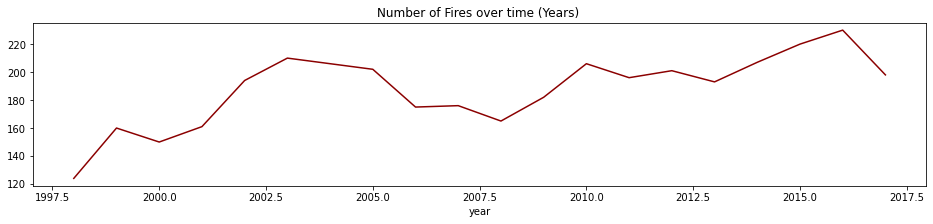

In [ ]:
df1.plot(kind = 'line', figsize=(16, 3), color = 'darkred')
plt.title('Number of Fires over time (Years) ')

We can see a gradual increase in fires initially from 1998-2005, and a decrease in fires from 2005-2008. Over the recent years we have again see an increase

# Plotting the number of forest fires taken place over months (1998-2017)

In [ ]:
df1=df.groupby(df['month'])['number'].sum().reindex(['Janeiro','Fevereiro','March','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])
df1

month
Janeiro      47747.844
Fevereiro    30848.050
March        30717.405
Abril        28188.770
Maio         34731.363
Junho        56010.675
Julho        92326.113
Agosto       88050.435
Setembro     58578.305
Outubro      88681.579
Novembro     85508.054
Dezembro     57535.480
Name: number, dtype: float64

Text(0.5, 1.0, 'Number of Fires over Months (1998-2017)  ')

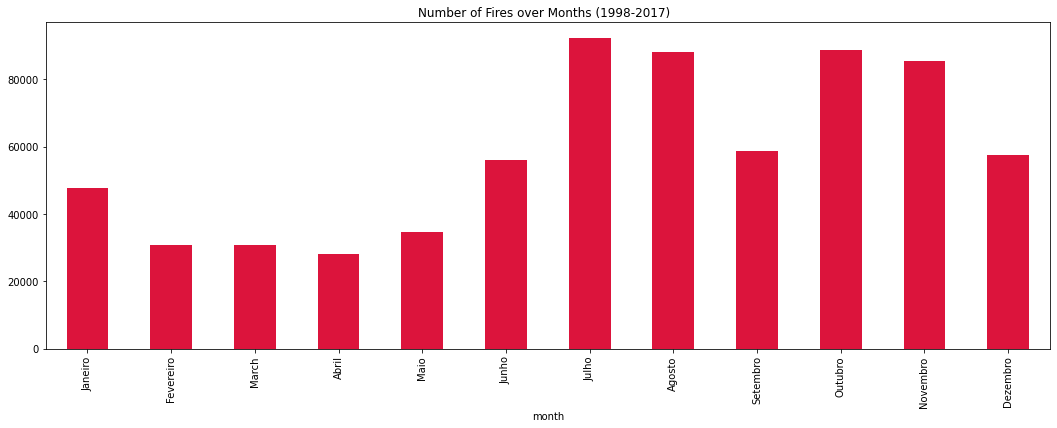

In [ ]:
df1.plot(kind = 'bar',figsize=(18, 6), color = 'crimson')
plt.title('Number of Fires over Months (1998-2017)  ')

From the bar graph we can see that July, August and October are when there are high number of forest fires. These months are usually the driest months of the year in Brazil, hence we can consider it to be a factor in the increase in fires

#Plotting a state-wise depiction of the number of forest fires

In [ ]:
df1=df.groupby(df['state'])['number'].sum().sort_values(ascending = True)
df1

state
Sergipe              3237.000
Distrito Federal     3561.000
Alagoas              4644.000
Espirito Santo       6546.000
Acre                18464.030
Rondonia            20285.429
Amapa               21831.576
Santa Catarina      24359.852
Roraima             24385.074
Pernambuco          24498.000
Pará                24512.144
Maranhao            25129.131
Ceara               30428.063
Amazonas            30650.129
Tocantins           33707.885
Minas Gerais        37475.258
Goias               37695.520
Piau                37803.747
Bahia               44746.226
Rio                 45160.865
Sao Paulo           51121.198
Paraiba             52435.918
Mato Grosso         96246.028
Name: number, dtype: float64

Text(0.5, 1.0, 'Number of Fires in various States (1998-2017)')

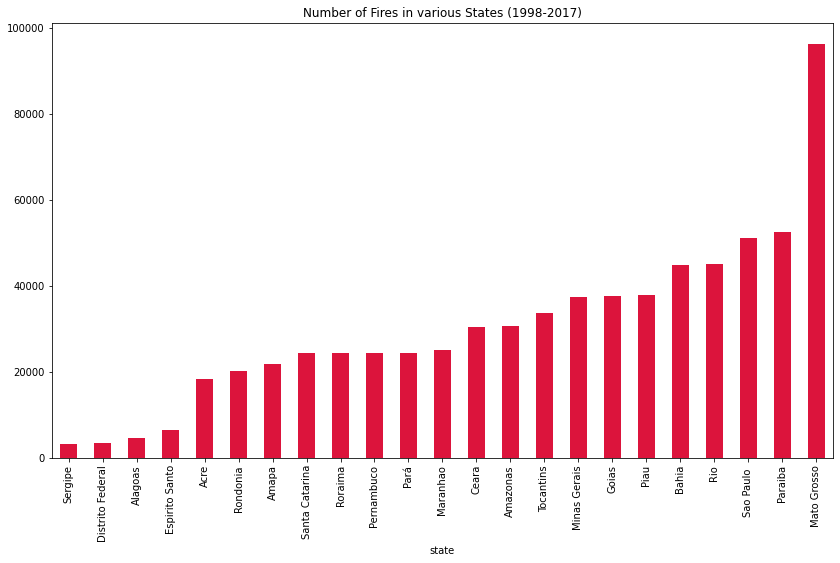

In [ ]:
df1.plot(kind = 'bar',figsize=(14, 8), color = 'crimson')
plt.title('Number of Fires in various States (1998-2017)')

We see that Matto Grosso and Paraiba are the states with large number of fires

#Geographical depiction of Forest Fires in Brazil

In [ ]:
df1=df.groupby(df['state'])['number'].sum().sort_values(ascending = True).to_frame(name = 'Count').reset_index()

In [ ]:
df2=df1.reset_index().sort_values('state')

In [ ]:
df2 = df2.reset_index()
df2.head(15)

,level_0,index,state,Count
0,4,4,Acre,18464.030
1,2,2,Alagoas,4644.000
2,6,6,Amapa,21831.576
3,13,13,Amazonas,30650.129
4,18,18,Bahia,44746.226
5,12,12,Ceara,30428.063
6,1,1,Distrito Federal,3561.000
7,3,3,Espirito Santo,6546.000
8,16,16,Goias,37695.520
9,11,11,Maranhao,25129.131


                                             geometry
0   POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...
1   MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...
2   MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...
3   POLYGON ((-67.32623 2.02968, -67.30118 1.92997...
4   MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...
5   MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ...
6   POLYGON ((-48.03603 -15.50022, -47.77200 -15.5...
7   MULTIPOLYGON (((-40.88403 -21.16125, -40.88403...
8   POLYGON ((-50.15817 -12.41238, -50.15942 -12.4...
9   MULTIPOLYGON (((-42.12375 -2.80069, -42.12375 ...
10  POLYGON ((-56.10364 -17.17354, -56.08440 -17.1...
11  POLYGON ((-57.60524 -8.66285, -57.59355 -8.707...
12  POLYGON ((-44.20978 -14.23665, -44.20908 -14.2...
13  MULTIPOLYGON (((-46.43458 -1.01708, -46.43458 ...
14  MULTIPOLYGON (((-42.87874 -9.29837, -42.86221 ...
15  MULTIPOLYGON (((-48.63070 -25.86792, -48.63070...
16  MULTIPOLYGON (((-35.13597 -8.83792, -35.13597 ...
17  POLYGON ((-41.81681 -2.7

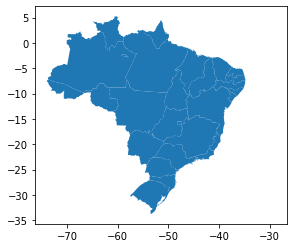

In [ ]:
fp = "BRA_adm1.shp"
map_df = gpd.read_file(fp)
map_df.plot()
print(map_df)

In [ ]:
map_df = map_df.drop(labels = [9,19,20] , axis = 0)
map_df=map_df.reset_index()
map_df = map_df.drop(columns='index')
map_df.head(25)

,geometry
0,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."
5,"MULTIPOLYGON (((-38.47542 -3.70097, -38.47542 ..."
6,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5..."
7,"MULTIPOLYGON (((-40.88403 -21.16125, -40.88403..."
8,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4..."
9,"POLYGON ((-56.10364 -17.17354, -56.08440 -17.1..."


In [ ]:
merged = map_df.join(df2)
merged = merged.dropna()
merged = merged[['state', 'geometry', 'Count']]
print(merged)

               state  ...      Count
0               Acre  ...  18464.030
1            Alagoas  ...   4644.000
2              Amapa  ...  21831.576
3           Amazonas  ...  30650.129
4              Bahia  ...  44746.226
5              Ceara  ...  30428.063
6   Distrito Federal  ...   3561.000
7     Espirito Santo  ...   6546.000
8              Goias  ...  37695.520
9           Maranhao  ...  25129.131
10       Mato Grosso  ...  96246.028
11      Minas Gerais  ...  37475.258
12           Paraiba  ...  52435.918
13              Pará  ...  24512.144
14        Pernambuco  ...  24498.000
15              Piau  ...  37803.747
16               Rio  ...  45160.865
17          Rondonia  ...  20285.429
18           Roraima  ...  24385.074
19    Santa Catarina  ...  24359.852
20        Sao Paulo   ...  51121.198
21           Sergipe  ...   3237.000
22         Tocantins  ...  33707.885

[23 rows x 3 columns]


In [ ]:
variable = 'Count'

In [ ]:
vmin = 0
vmax = merged['Count'].max()

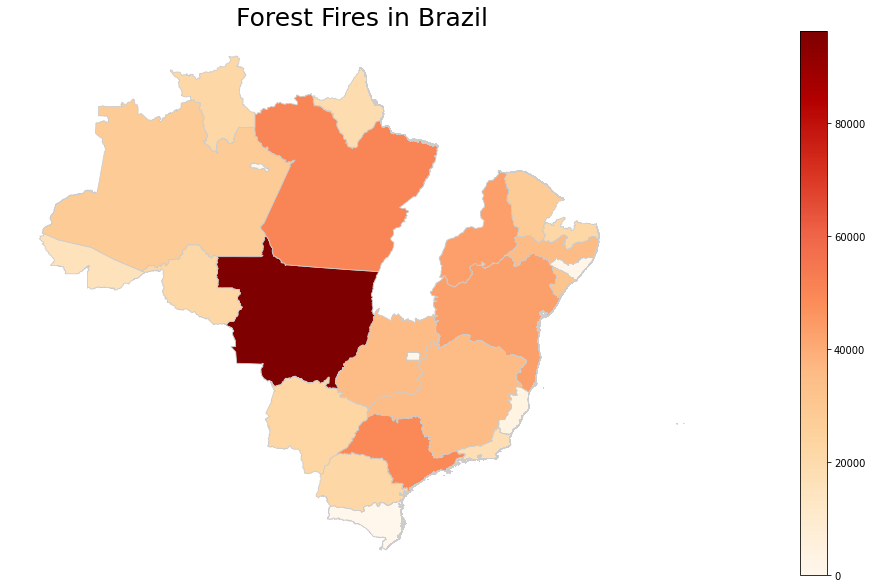

In [ ]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('Forest Fires in Brazil', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='OrRd',norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([]) 
fig.colorbar(sm)
merged.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()